In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [3]:
data=pd.read_csv('avocado.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
data['Revenu']=data['AveragePrice']*data['Total Volume']
data.shape

(18249, 15)

In [7]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Revenu
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880


In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values("Date", inplace = True)
data.set_index('Date', inplace=True) 

In [9]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Revenu
Date,,,,,,,,,,,,,,
2015-01-04,51,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,47890.3075
2015-01-04,51,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,26407.5233
2015-01-04,51,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,4866.4896
2015-01-04,51,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,83534.3360
2015-01-04,51,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,2468.3968


In [10]:
#data1=data['Revenu'].resample('W').mean()
data1=data.groupby(by="Date")["Revenu"].mean()

In [11]:
print(data1.shape)
data1.head()

(169,)


Date
2015-01-04    750702.619269
2015-01-11    741892.068805
2015-01-18    758208.396494
2015-01-25    745209.190481
2015-02-01    998393.161818
Name: Revenu, dtype: float64

In [12]:
#data1=data1[:"2018-04-15"]

# Model Builiding

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
Decomposed_Series = seasonal_decompose(data1)

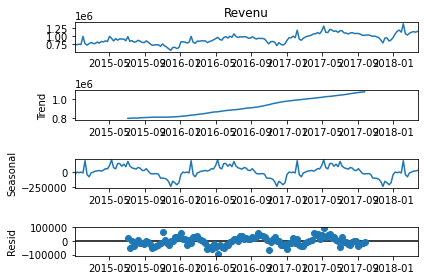

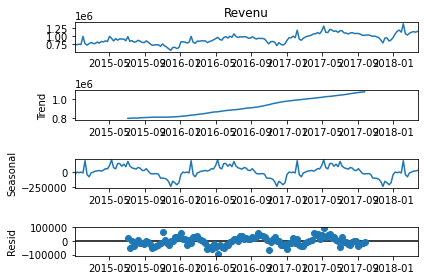

In [14]:
Decomposed_Series.plot()

In [15]:
Train = data1[:130].copy() # First 3 years for training (2015-2018)
Test = data1[130:].copy() 

## 1. Stats Models

In [16]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
SES = SimpleExpSmoothing(Train).fit(smoothing_level=0.01) # Model building
SES.summary()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Revenu,No. Observations:,130
Model:,SimpleExpSmoothing,SSE,2274774142564.303
Optimized:,True,AIC,3070.098
Trend:,None,BIC,3075.833
Seasonal:,None,AICC,3070.418
Seasonal Periods:,None,Date:,"Wed, 14 Dec 2022"
Box-Cox:,False,Time:,12:50:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0100000,alpha,False
initial_level,8.7404e+05,l.0,True


In [30]:
Forecast = SES.forecast(52).rename('Forecast') # Model Forecasting
Actual_Forecast_Df = pd.concat([data1,Forecast], axis = 1) 


In [31]:
Actual_Forecast_Df

,Revenu,Forecast
2015-01-04,750702.619269,NaN
2015-01-11,741892.068805,NaN
2015-01-18,758208.396494,NaN
2015-01-25,745209.190481,NaN
2015-02-01,998393.161818,NaN
...,...,...
2018-05-27,NaN,908515.955706
2018-06-03,NaN,908515.955706
2018-06-10,NaN,908515.955706
2018-06-17,NaN,908515.955706


<AxesSubplot:>

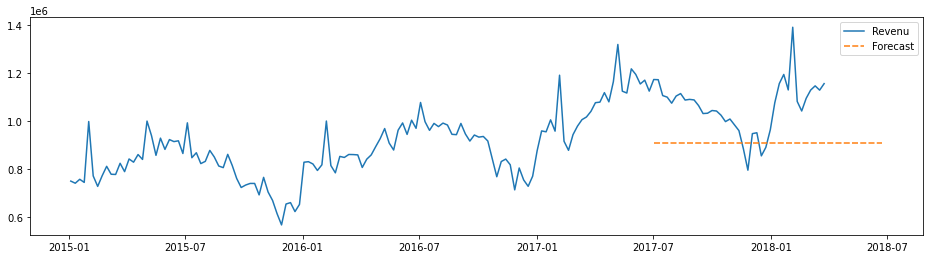

In [32]:
plt.figure(figsize=(16,4))
sns.lineplot(data = Actual_Forecast_Df)

In [20]:
Validation_Df = Actual_Forecast_Df[150:].copy()
MAPE=np.mean(abs(Validation_Df['Revenu'] - Validation_Df['Forecast'])/Validation_Df['Revenu'])*100 # MAPE
RSME=np.sqrt(np.mean((Validation_Df['Revenu'] - Validation_Df['Forecast'])**2)) # RMSE
print("MAPE ",MAPE)
print("RSME ",RSME)

MAPE  8.411678283974162
RSME  81286.6514144492


In [21]:
# Creating function
def myFun(model):
    Forecast = model.forecast(52).rename('Forecast') # Model Forecasting
    # Act, Forecast combining
    Actual_Forecast_Df = pd.concat([data1, Forecast], axis = 1) 
    # Plot
    sns.lineplot(data = Actual_Forecast_Df)
    ## Validation
    Validation_Df = Actual_Forecast_Df[150:].copy()
    print("MAPE",np.mean(abs(Validation_Df['Revenu'] - Validation_Df['Forecast'])/Validation_Df['Revenu'])*100) # MAPE
    print("RMSE",np.sqrt(np.mean((Validation_Df['Revenu'] - Validation_Df['Forecast'])**2))) # RMSE

In [22]:

# DES Model

DES = Holt(Train).fit(smoothing_level=0.01, smoothing_slope=0.6)
DES.summary()


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Revenu,No. Observations:,130
Model:,Holt,SSE,2905310091472.029
Optimized:,True,AIC,3105.903
Trend:,Additive,BIC,3117.374
Seasonal:,None,AICC,3106.586
Seasonal Periods:,None,Date:,"Wed, 14 Dec 2022"
Box-Cox:,False,Time:,12:50:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0100000,alpha,False
smoothing_trend,0.6000000,beta,False


MAPE 22.038764274800936
RMSE 233368.09290486854


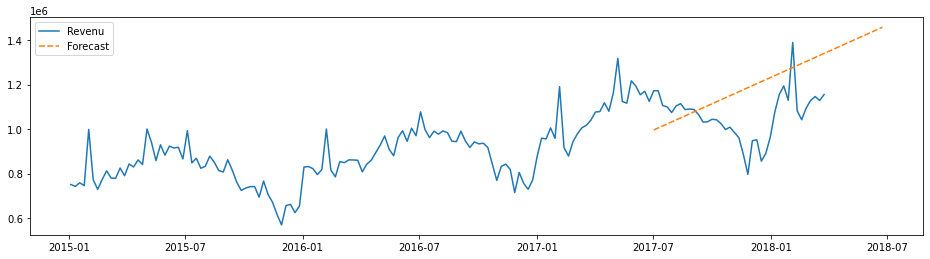

In [23]:
plt.figure(figsize=(16,4))
myFun(DES)

In [24]:
# TES Mode
TES = ExponentialSmoothing(Train, 
                           seasonal_periods=52, 
                           seasonal='add',
                           trend = 'add').fit(smoothing_level=0.01, 
                                      smoothing_slope=0.1, 
                                      smoothing_seasonal = 0.3) 

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE 5.440707493606413
RMSE 62587.61493741938


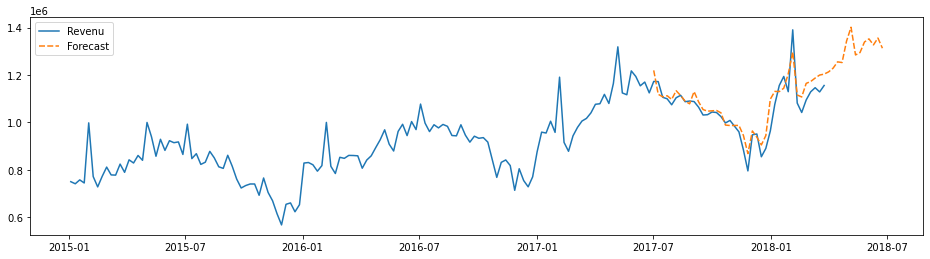

In [25]:
TES.summary()
plt.figure(figsize=(16,4))
myFun(TES)

<AxesSubplot:>

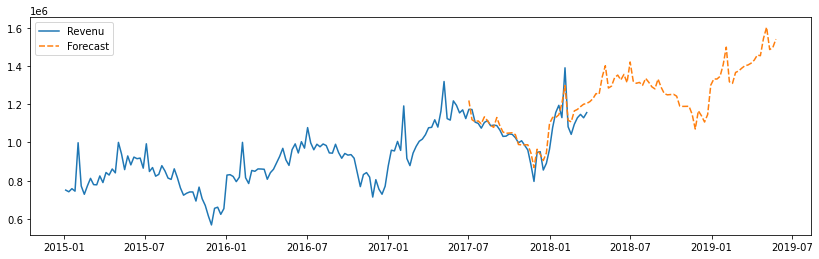

In [26]:
Forecast = TES.forecast(100).rename('Forecast')
Actual_Forecast_Df = pd.concat([data1, Forecast], axis = 1)

## Plot
plt.figure(figsize=(14,4))
sns.lineplot(data = Actual_Forecast_Df)

### TES: Automatic selection of level, trend and seasonal smoothing components (alpha, beta, gamma)

In [27]:
## Model
TES2 = ExponentialSmoothing(Train, 
                           seasonal_periods=52, 
                           seasonal='add',
                           trend='add').fit() # Leave fit() empty, then it will automatically find alpha, beta, gamma


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE 4.055454907582998
RMSE 59075.626036439404


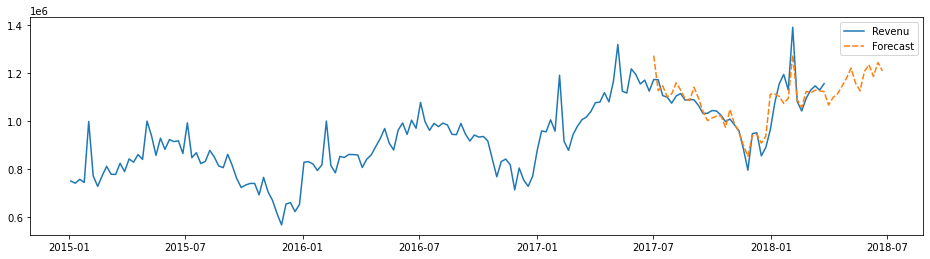

In [28]:
plt.figure(figsize=(16,4))
myFun(TES2)

In [29]:
TES2.params

{'smoothing_level': 0.28785714285714287,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 9.999999999999999e-05,
 'damping_trend': nan,
 'initial_level': 799579.3726617676,
 'initial_trend': 926.1842299524142,
 'initial_seasons': array([  20507.41757047,   20507.45178999,    8623.04650645,
         -20770.71320428,    -371.25910739,  179135.53880702,
          -8206.70934027,  -41036.63869971,   24699.32885762,
          17747.0581032 ,   27631.14330375,   24463.10958139,
          19542.76385709,  -36732.47956099,   -6152.34470125,
           8131.87257512,   39419.69974304,   71221.81560061,
         111835.91055013,   48717.48448593,   16105.63419985,
          95243.43596965,  122443.65619878,   72480.76463708,
         129582.51211748,   93709.33010676,  205155.37369626,
          58554.85956577,   77805.01036355,   31581.76197433,
          42108.64657636,   87289.23058187,   56842.63437547,
          18320.53590279,   11119.35888737,   65221.66268707,
          17782.28022851,

## TES Grid Search



In [ ]:

myAlpha = np.round(np.arange(0,1.1,0.1),2)
myBeta = np.round(np.arange(0,1.1,0.1),2)
myGamma = np.round(np.arange(0,1.1,0.1),2)

alphaList = []
betaList = []
gammaList = []
mapeList = []

for alpha in myAlpha:
    for beta in myBeta:
        for gamma in myGamma:
            
            print(alpha, beta, gamma)
                                              
            TES = ExponentialSmoothing(Train, 
                           seasonal_periods=52, 
                           seasonal='add', 
                           trend = 'add').fit(smoothing_level = alpha, 
                                      smoothing_slope = beta, 
                                      smoothing_seasonal = gamma)
            
            Forecast = TES.forecast(52).rename('Forecast')
            Actual_Forecast_Df = pd.concat([data1, Forecast], axis = 1)
            Validation_Df = Actual_Forecast_Df[150:].copy()
            tempMAPE = np.mean(abs(Validation_Df['Revenu'] - Validation_Df['Forecast'])/Validation_Df['Revenu'])*100 # MAPE
            
            
            alphaList.append(alpha)
            betaList.append(beta)
            gammaList.append(gamma)
            mapeList.append(tempMAPE)
            
            
evaluationDf = pd.DataFrame({"alpha": alphaList,
                             "beta": betaList,
                             "gamma": gammaList,
                             "MAPE": mapeList})        
evaluationDf.to_csv("EvaluationDf.csv") 

### i will get my best mape  where  alpha =0,beta =0.3 and gamma = 0.5 

In [54]:
 TES = ExponentialSmoothing(Train, 
                           seasonal_periods=52, 
                           seasonal='add', 
                           trend = 'add').fit(smoothing_level = 0, 
                                      smoothing_slope = 0.3, 
                                      smoothing_seasonal =0.5)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE 3.2663178888127358
RMSE 51730.68747589992


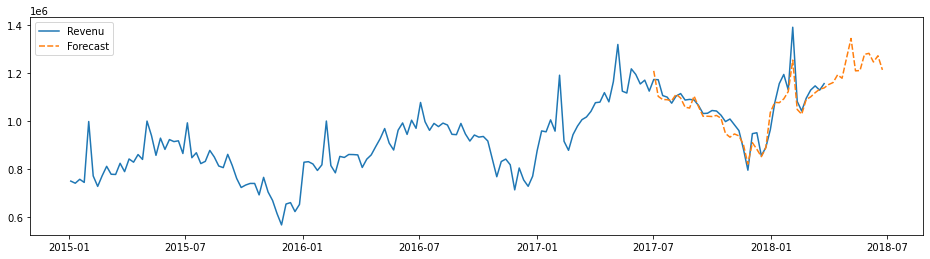

In [56]:
plt.figure(figsize=(16,4))
myFun(TES)

## let try arima and smarima

In [57]:
from pmdarima import auto_arima
arimaModel2 = auto_arima(Train,m=12,n_jobs=-1)

In [58]:
## Get the order of p,d,q & P,D,Q
arimaModel2.get_params()['order'] # p,d,q
arimaModel2.get_params()['seasonal_order'] # P,D,Q

(0, 0, 0, 12)

In [33]:

## Forecasting
Forecast = pd.Series(arimaModel2.predict(52)).rename('Forecast')
Forecast.index = Test.index
Actual_Forecast_Df = pd.concat([data1, Forecast], axis = 1)

NameError: name 'arimaModel2' is not defined

<AxesSubplot:xlabel='Date'>

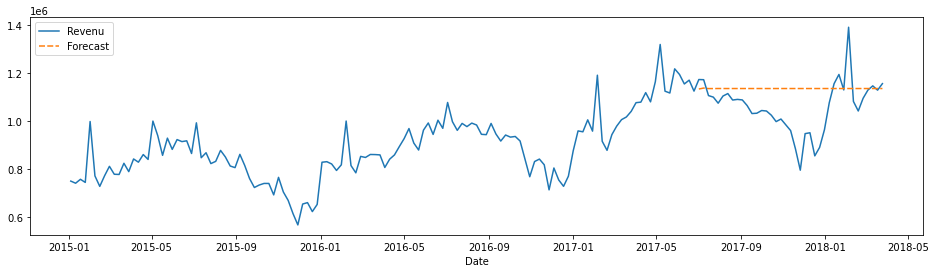

In [60]:
## Plot
plt.figure(figsize=(16,4))
sns.lineplot(data = Actual_Forecast_Df)

In [87]:
## Validation
Validation_Df = Actual_Forecast_Df[150:].copy()
print(np.mean(abs(Validation_Df['Revenu'] - Validation_Df['Forecast'])/Validation_Df['Revenu'])*100) # MAPE
print(np.sqrt(np.mean((Validation_Df['Revenu'] - Validation_Df['Forecast'])**2))) # RMSE


12.658463967696196
162334.97783360188


In [89]:
from pmdarima.arima import ARIMA

In [91]:
# ARIMA Grid Search
################

p = range(0,2)
d = range(0,2)
q = range(0,2)
P = range(2)
D = range(2)
Q = range(2)

pList = []
dList = []
qList = []
PList = []
DList = []
QList = []
mapeList = []
#seasonalPDQList = []

for i in p:
    for j in d:
        for k in q:
            for I in P:
                for J in D:
                    for K in Q:
            
                        print(i,j,k, I, J, K)
                        tempArimaModel = ARIMA((i,j,k), (I,J,K,12)).fit(Train)
                        
                        Forecast = pd.Series(tempArimaModel.predict(39)).rename('Forecast')
                        Forecast.index = Test.index
                        Actual_Forecast_Df = pd.concat([data1, Forecast], axis = 1)
                        Validation_Df = Actual_Forecast_Df[150:].copy()
                        tempMAPE = np.mean(abs(Validation_Df['Revenu'] - Validation_Df['Forecast'])/Validation_Df['Revenu'])*100 # MAPE
                        
                        pList.append(i)
                        dList.append(j)
                        qList.append(k)
                        PList.append(I)
                        DList.append(J)
                        QList.append(K)
                        mapeList.append(tempMAPE)
            
            
arimaEvaluationDf = pd.DataFrame({"p": pList,
                             "d": dList,
                             "q": qList,
                             "P": PList,
                             "D": DList,
                             "Q": QList,
                             "MAPE": mapeList})        
            
arimaEvaluationDf.to_csv("ArimaEvaluation.csv")

0 0 0 0 0 0
0 0 0 0 0 1
0 0 0 0 1 0
0 0 0 0 1 1
0 0 0 1 0 0
0 0 0 1 0 1
0 0 0 1 1 0
0 0 0 1 1 1
0 0 1 0 0 0
0 0 1 0 0 1
0 0 1 0 1 0
0 0 1 0 1 1
0 0 1 1 0 0
0 0 1 1 0 1
0 0 1 1 1 0
0 0 1 1 1 1
0 1 0 0 0 0
0 1 0 0 0 1
0 1 0 0 1 0
0 1 0 0 1 1
0 1 0 1 0 0
0 1 0 1 0 1
0 1 0 1 1 0
0 1 0 1 1 1
0 1 1 0 0 0
0 1 1 0 0 1
0 1 1 0 1 0
0 1 1 0 1 1
0 1 1 1 0 0
0 1 1 1 0 1
0 1 1 1 1 0
0 1 1 1 1 1
1 0 0 0 0 0
1 0 0 0 0 1
1 0 0 0 1 0
1 0 0 0 1 1
1 0 0 1 0 0
1 0 0 1 0 1
1 0 0 1 1 0
1 0 0 1 1 1
1 0 1 0 0 0
1 0 1 0 0 1
1 0 1 0 1 0
1 0 1 0 1 1
1 0 1 1 0 0
1 0 1 1 0 1
1 0 1 1 1 0
1 0 1 1 1 1
1 1 0 0 0 0
1 1 0 0 0 1
1 1 0 0 1 0
1 1 0 0 1 1
1 1 0 1 0 0
1 1 0 1 0 1
1 1 0 1 1 0
1 1 0 1 1 1
1 1 1 0 0 0
1 1 1 0 0 1
1 1 1 0 1 0
1 1 1 0 1 1
1 1 1 1 0 0
1 1 1 1 0 1
1 1 1 1 1 0
1 1 1 1 1 1


In [92]:
# Finalize arima full model (This is very important)
###############

arimFinalModel = ARIMA((1,0,1), (1,0,1,12)).fit(Train)


In [93]:
## Forecasting
Forecast = pd.Series(arimFinalModel.predict(39)).rename('Forecast')
Actual_Forecast_Df = pd.concat([data1, Forecast], axis = 1) # Column wise binding

<AxesSubplot:>

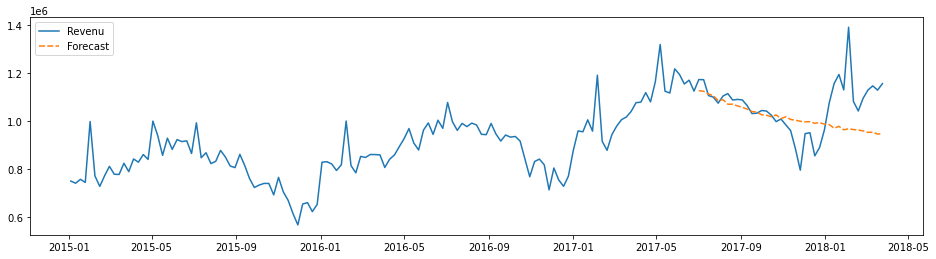

In [95]:
## Plot
plt.figure(figsize=(16,4))
sns.lineplot(data = Actual_Forecast_Df)

In [96]:
## Validation
Validation_Df = Actual_Forecast_Df[150:].copy()
print(np.mean(abs(Validation_Df['Revenu'] - Validation_Df['Forecast'])/Validation_Df['Revenu'])*100) # MAPE
print(np.sqrt(np.mean((Validation_Df['Revenu'] - Validation_Df['Forecast'])**2))) # RMSE


13.876249061114116
172770.03135472757


#### sarima- seanonality also cantain

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(Train,
                order=(1,1,1),
                seasonal_order=(1,1,0,12))
Revenu = sarima.fit().predict()

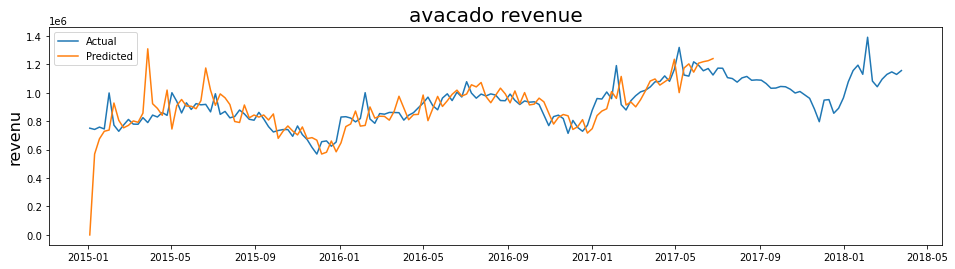

In [125]:
plt.figure(figsize=(16,4))
plt.plot(data1, label="Actual")
plt.plot(Revenu, label="Predicted")
plt.title('avacado revenue', fontsize=20)
plt.ylabel('revenu', fontsize=16)
plt.legend()


In [126]:
Validation_Df = Actual_Forecast_Df[150:].copy()
print(np.mean(abs(Validation_Df['Revenu'] - Validation_Df['Forecast'])/Validation_Df['Revenu'])*100) # MAPE
print(np.sqrt(np.mean((Validation_Df['Revenu'] - Validation_Df['Forecast'])**2))) # RMSE


13.876249061114116
172770.03135472757


# Finalize TES full model

In [29]:

 TES_Final_Model = ExponentialSmoothing(Train, 
                            seasonal_periods=52, 
                            seasonal='add',
                            trend = 'add').fit(smoothing_level=0, 
                                       smoothing_slope=0.3, 
                                       smoothing_seasonal = 0.5) 



C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [30]:

Forecast = TES_Final_Model.forecast(100).rename('Forecast')
Actual_Forecast_Df = pd.concat([data1, Forecast], axis = 1)



<AxesSubplot:>

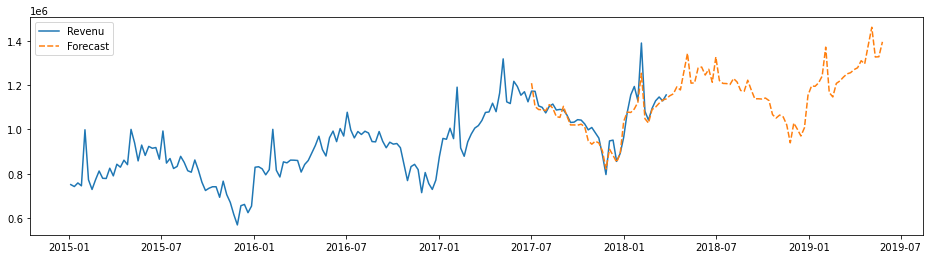

In [31]:
## Plot
plt.figure(figsize=(16,4))
sns.lineplot(data = Actual_Forecast_Df)

In [32]:
Validation_Df = Actual_Forecast_Df[150:].copy()
print(np.mean(abs(Validation_Df['Revenu'] - Validation_Df['Forecast'])/Validation_Df['Revenu'])*100) # MAPE
print(np.sqrt(np.mean((Validation_Df['Revenu'] - Validation_Df['Forecast'])**2))) # RMSE

3.2663178888127358
51730.68747589992
